Question 1 - Extracting Tesla Stock Data Using yfinance

In [2]:
!pip install yfinance
!pip install matplotlib

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
tesla = yf.Ticker("SHOP")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-05-20 00:00:00-04:00,1.700,1.700,1.700,1.700,0,0.0,0.0
1,2015-05-21 00:00:00-04:00,2.800,2.874,2.411,2.568,123039000,0.0,0.0
2,2015-05-22 00:00:00-04:00,2.607,3.110,2.600,2.831,28412000,0.0,0.0
3,2015-05-26 00:00:00-04:00,2.980,3.034,2.908,2.965,8202000,0.0,0.0
4,2015-05-27 00:00:00-04:00,3.067,3.081,2.700,2.750,7976000,0.0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [5]:
!pip install pandas
!pip install requests
!pip install bs4

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [10]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_revenue  = requests.get(url).text

In [11]:
# Step 1: Create the DataFrame
tesla_revenue = pd.DataFrame()
# Step 2: Find the correct revenue table
html_data= requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Check for the Tesla Quarterly Revenue Table
# The second <tbody> tag contains the quarterly revenue table
table = soup.find_all("tbody")[1]

# Step 4: Iterate Through Rows in the Table Body
for row in table.find_all("tr"):
    
    # Step 5: Extract Data from Columns
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        
        # Skip if revenue is empty or "N/A"
        if revenue !="": 
            # Step 6: Append Data to the DataFrame
            new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
            tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Clean the Revenue column (remove $ and commas)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace(
    {r"\$": "", ",": ""}, regex=True)
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
51  2009-09-30      46
52  2009-06-30      27


Question 3 - Extracting GameStop Stock Data Using yfinance

In [23]:
gme = yf.Ticker("SHOP")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-05-20 00:00:00-04:00,1.700,1.700,1.700,1.700,0,0.0,0.0
1,2015-05-21 00:00:00-04:00,2.800,2.874,2.411,2.568,123039000,0.0,0.0
2,2015-05-22 00:00:00-04:00,2.607,3.110,2.600,2.831,28412000,0.0,0.0
3,2015-05-26 00:00:00-04:00,2.980,3.034,2.908,2.965,8202000,0.0,0.0
4,2015-05-27 00:00:00-04:00,3.067,3.081,2.700,2.750,7976000,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [39]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_revenue = requests.get(url).text

html_data_2= requests.get(url).text

In [41]:
soup = BeautifulSoup(html_data_2, 'html.parser')

In [52]:
gme_revenue = pd.DataFrame()
table = soup.find_all("tbody")[1]

# Step 4: Iterate Through Rows in the Table Body
for row in table.find_all("tr"):
    
    # Step 5: Extract Data from Columns
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        
        # Skip if revenue is empty or "N/A"
        if revenue !="": 
            # Step 6: Append Data to the DataFrame
            new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
            gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

# Clean the Revenue column (remove $ and commas)
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(
    {r"\$": "", ",": ""}, regex=True)

In [53]:

print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


Question 5: Plot Tesla Stock Graph

In [48]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

In [37]:
# Make sure 'Date' is datetime type
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

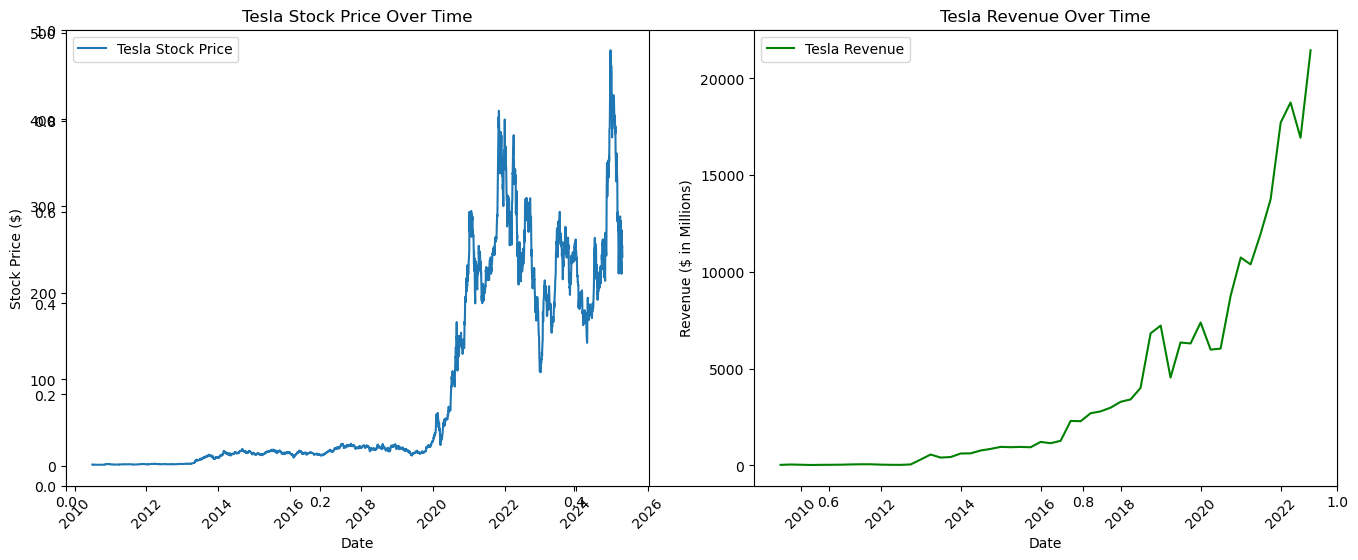

In [38]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Subplot 1: Tesla Stock Price
plt.subplot(1, 2, 1)
plt.plot(tesla_data['Date'], tesla_data['Close'], label="Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("Tesla Stock Price Over Time")
plt.xticks(rotation=45)
plt.legend()

# Subplot 2: Tesla Revenue
plt.subplot(1, 2, 2)
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], color="green", label="Tesla Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue ($ in Millions)")
plt.title("Tesla Revenue Over Time")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Question 6 - GameStop Stock and Revenue Dashboard

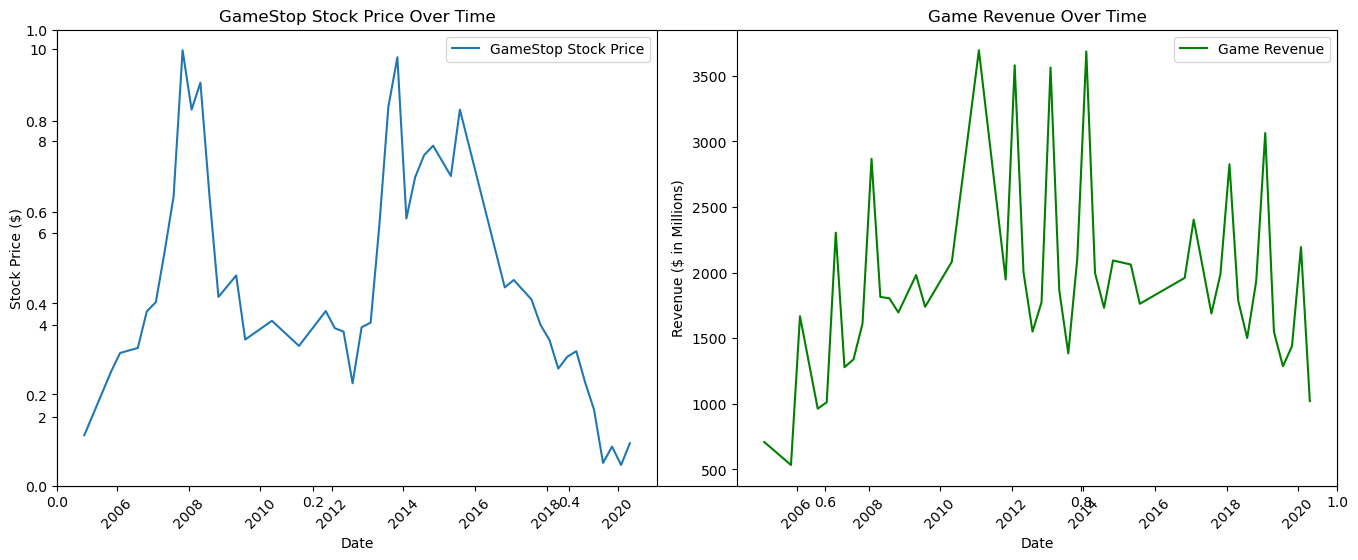

In [60]:
# GameStop Stock Data
game = yf.Ticker("GME")
gme_data = game.history(period="max")
gme_data.reset_index(inplace=True)

# Clean up Revenue data
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"]).dt.tz_localize(None)  # Remove time zone
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Remove time zone from the 'Date' column in stock data
gme_data['Date'] = pd.to_datetime(gme_data['Date']).dt.tz_localize(None)

# Merge the datasets on Date to ensure they match up
merged_data = pd.merge(gme_data[['Date', 'Close']], gme_revenue[['Date', 'Revenue']], on='Date', how='inner')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Subplot 1: GameStop Stock Price
plt.subplot(1, 2, 1)
plt.plot(merged_data['Date'], merged_data['Close'], label="GameStop Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("GameStop Stock Price Over Time")
plt.xticks(rotation=45)
plt.legend()

# Subplot 2: Game Revenue
plt.subplot(1, 2, 2)
plt.plot(merged_data["Date"], merged_data["Revenue"], color="green", label="Game Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue ($ in Millions)")
plt.title("Game Revenue Over Time")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
